In [35]:
import os
import pandas as pd

from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole

from rdkit.Chem import PyMol
# You need to run "pymol -R" before
pymol = PyMol.MolViewer()
pymol.server.do('bg_color white')

import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

import pylab as plot
params = {'legend.fontsize': 10}
plot.rcParams.update(params)

# Fasta sequence

NLYIQWLKDGGPSSGRPPPS

# Experimental structure

In [59]:
pymol.DeleteAll()
pymol.LoadFile(os.path.abspath('../1L2Y.pdb'), '1L2Y')
pymol.SetDisplayStyle('1L2Y', 'cartoon')

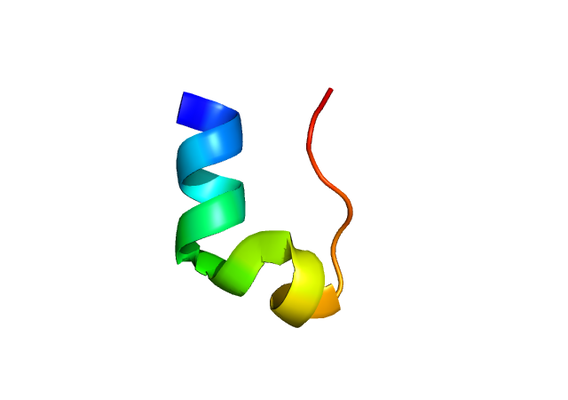

In [12]:
pymol.server.do('spectrum resi')
pymol.server.do('ray')
pymol.GetPNG(h=400)

# Initial structure

In [13]:
pymol.DeleteAll()
pymol.LoadFile(os.path.abspath('../1L2Y_P_h.pdb'), '1L2Y_P_h')
pymol.SetDisplayStyle('1L2Y_P_h', 'cartoon')

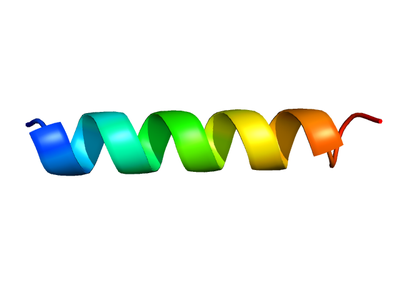

In [20]:
pymol.server.do('spectrum resi')
pymol.server.do('ray')
pymol.GetPNG(h=300)

In [2]:
temperature = pd.read_fwf(
    'simulation_01/summary.TEMP', 
    colspecs=[(1, 12),(13, 23)], 
    index_col=0,
    names=["Time", "Temperature"]
)
temperature[:5]

,Temperature
Time,
0,11.20
1,12.17
2,135.11
3,205.10
4,242.07
5,266.03


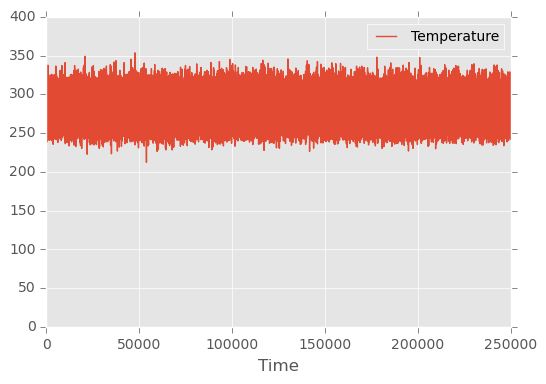

In [36]:
temperature.plot()

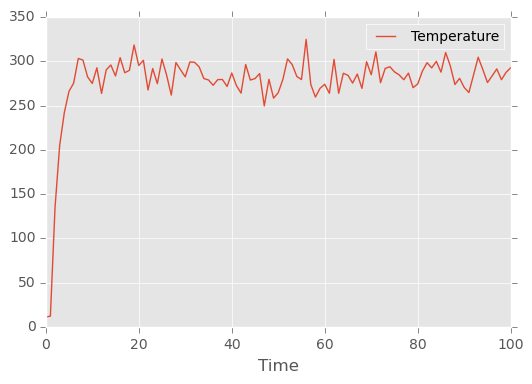

In [37]:
ax = temperature[:100].plot()

In [5]:
etot = pd.read_fwf(
    'simulation_01/summary.ETOT',
    index_col=0,    
    colspecs=[(1, 12),(13, 29)], 
    names=['Time', 'Total Energy']
)
ektot = pd.read_fwf(
    'simulation_01/summary.EKTOT', 
    index_col=0,  
    colspecs=[(1, 12),(13, 29)], 
    names=['Time', 'Kinetic Energy']
)
eptot = pd.read_fwf(
    'simulation_01/summary.EPTOT', 
    index_col=0,  
    colspecs=[(1, 12),(13, 29)], 
    names=['Time', 'Potential Energy']
)
energy = etot.join(ektot).join(eptot)
energy[:5]

,Total Energy,Kinetic Energy,Potential Energy
Time,,,
0,-602.1373,8.4110,-610.5483
1,-601.6325,9.1438,-610.7763
2,-401.3721,101.4856,-502.8577
3,-285.1293,154.0621,-439.1914
4,-241.9356,181.8356,-423.7712
5,-206.0546,199.8273,-405.8819


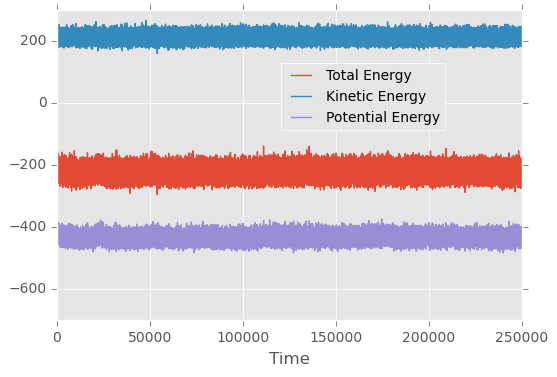

In [38]:
fig = energy.plot()
fig.legend(loc='upper right', bbox_to_anchor=(0.85, 0.85))

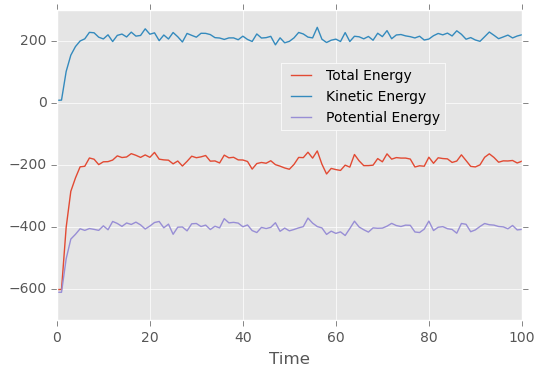

In [39]:
fig = energy[:100].plot()
fig.legend(loc='upper right', bbox_to_anchor=(0.85, 0.85))